In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


part 1 & 2

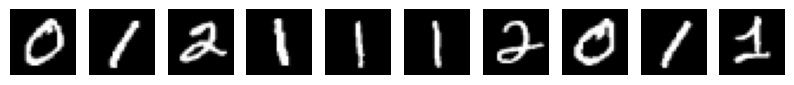

In [9]:
# دانلود مجموعه داده MNIST
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# انتخاب فقط ارقام 0، 1 و 2
mask_train = np.isin(y_train_full, [0, 1, 2])
mask_test = np.isin(y_test_full, [0, 1, 2])

X_train = X_train_full[mask_train]
y_train = y_train_full[mask_train]
X_test = X_test_full[mask_test]
y_test = y_test_full[mask_test]

# نرمال‌سازی مقادیر پیکسل‌ها به محدوده [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# نمایش چند نمونه از تصاویر
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax = axes[i]
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
plt.show()


part 3

In [8]:
def extract_hu_moments(images):
    hu_moments = []
    for image in images:
        # تبدیل تصویر به باینری
        _, binary_image = cv2.threshold(image, 0.5, 1, cv2.THRESH_BINARY_INV)
        # تبدیل تصویر به نوع uint8 برای استفاده از OpenCV
        binary_image = (binary_image * 255).astype(np.uint8)
        # محاسبه لحظات Hu
        moments = cv2.moments(binary_image)
        hu = cv2.HuMoments(moments).flatten()
        hu_moments.append(hu)
    return np.array(hu_moments)

X_train_hu = extract_hu_moments(X_train)
X_test_hu = extract_hu_moments(X_test)

# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train_hu = scaler.fit_transform(X_train_hu)
X_test_hu = scaler.transform(X_test_hu)


part 4


In [11]:
# تقسیم داده‌ها به مجموعه‌های آموزش و آزمایش
X_train_hu, X_val_hu, y_train, y_val = train_test_split(X_train_hu, y_train, test_size=0.2, random_state=42)

# آموزش مدل جنگل‌های تصادفی
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_hu, y_train)

# پیش‌بینی برچسب‌ها
y_val_pred = clf.predict(X_val_hu)
y_test_pred = clf.predict(X_test_hu)

# محاسبه دقت
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


Validation Accuracy: 0.86
Test Accuracy: 0.85


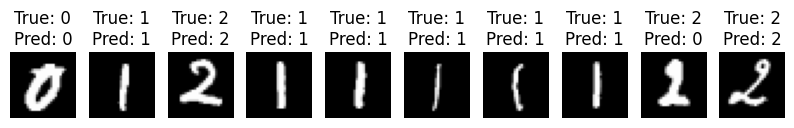

In [13]:
# نمایش برخی از تصاویر و برچسب‌های پیش‌بینی شده
def plot_images(images, labels_true, labels_pred, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {labels_true[i]}\nPred: {labels_pred[i]}')
        plt.axis('off')
    plt.show()

# انتخاب چند تصویر برای نمایش
num_images = 10
indices = np.random.choice(range(len(X_test_hu)), num_images, replace=False)
plot_images(X_test[indices], y_test[indices], y_test_pred[indices])


implement with neural network:

Epoch 1/10
466/466 [==============================] - 6s 10ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0250 - val_accuracy: 0.9914
Epoch 2/10
466/466 [==============================] - 3s 5ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0193 - val_accuracy: 0.9938
Epoch 3/10
466/466 [==============================] - 3s 5ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0157 - val_accuracy: 0.9954
Epoch 4/10
466/466 [==============================] - 2s 5ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0184 - val_accuracy: 0.9928
Epoch 5/10
466/466 [==============================] - 3s 7ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0156 - val_accuracy: 0.9941
Epoch 6/10
466/466 [==============================] - 3s 7ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 0.0152 - val_accuracy: 0.9957
Epoch 7/10
466/466 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0165 - val_accuracy: 0.9946
Epoch

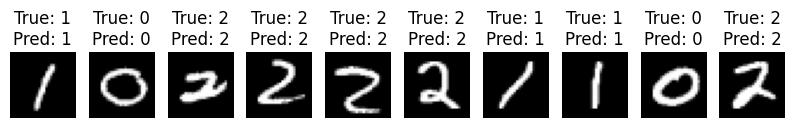

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# دانلود مجموعه داده MNIST
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# انتخاب فقط ارقام 0، 1 و 2
mask_train = np.isin(y_train_full, [0, 1, 2])
mask_test = np.isin(y_test_full, [0, 1, 2])

X_train = X_train_full[mask_train]
y_train = y_train_full[mask_train]
X_test = X_test_full[mask_test]
y_test = y_test_full[mask_test]

# نرمال‌سازی مقادیر پیکسل‌ها به محدوده [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# تبدیل برچسب‌ها به قالب one-hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
model = Sequential([
    Flatten(input_shape=(28, 28)),  # تبدیل تصاویر 2D به یک بردار 1D
    Dense(128, activation='relu'),  # لایه مخفی با 128 نورون و فعال‌سازی ReLU
    Dense(64, activation='relu'),   # لایه مخفی با 64 نورون و فعال‌سازی ReLU
    Dense(3, activation='softmax')  # لایه خروجی با 3 نورون و فعال‌سازی softmax برای طبقه‌بندی 3 کلاسه
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

# پیش‌بینی برچسب‌ها
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# نمایش برخی از تصاویر و برچسب‌های پیش‌بینی شده
def plot_images(images, labels_true, labels_pred, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.title(f'True: {labels_true[i]}\nPred: {labels_pred[i]}')
        plt.axis('off')
    plt.show()

# انتخاب چند تصویر برای نمایش
num_images = 10
indices = np.random.choice(range(len(X_test)), num_images, replace=False)
plot_images(X_test[indices], y_test_true_classes[indices], y_test_pred_classes[indices])
